In [3]:
#Importing different libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import confusion_matrix

In [4]:
data=pd.read_csv('/content/The_Grades_Dataset.csv') #importing CSV file as dataframe
data.head()

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,CS-97001,B-,D+,C-,C,C-,D+,D,C-,B-,...,C-,C-,C-,C-,A-,A,C-,B,A-,2.205
1,CS-97002,A,D,D+,D,B-,C,D,A,D+,...,D+,D,C,D,A-,B-,C,C,B,2.008
2,CS-97003,A,B,A,B-,B+,A,B-,B+,A-,...,B,B,A,C,A,A,A,A-,A,3.608
3,CS-97004,D,C+,D+,D,D,A-,D+,C-,D,...,D+,C,D+,C-,B-,B,C+,C+,C+,1.906
4,CS-97005,A-,A-,A-,B+,A,A,A-,B+,A,...,B-,B+,B+,B-,A-,A,A-,A-,A,3.448


In [5]:
data.shape #checking for rows and columns

(571, 43)

In [6]:
data = data.drop(['Seat No.','CS-403','CS-421','CS-406'	,'CS-414'	,'CS-419'	,'CS-423'	,'CS-412'],axis = 1)  #droping some unwanted columns
data.head()

,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,CS-301,CS-302,TC-383,MT-442,EL-332,CS-318,CS-306,CS-312,CS-317,CGPA
0,B-,D+,C-,C,C-,D+,D,C-,B-,C-,...,B,C,C+,B+,C,C-,C,C-,C-,2.205
1,A,D,D+,D,B-,C,D,A,D+,D,...,A-,D+,C-,C-,C,A-,D,D+,D,2.008
2,A,B,A,B-,B+,A,B-,B+,A-,A-,...,B+,A-,B,A,B+,A-,A-,B,B,3.608
3,D,C+,D+,D,D,A-,D+,C-,D,C+,...,D,B-,D+,C-,D+,B+,C-,D+,C,1.906
4,A-,A-,A-,B+,A,A,A-,B+,A,A-,...,B-,A-,C+,A-,A-,B-,A-,B-,B+,3.448


In [7]:
data.isnull().any() #checking for NULL values column wise
                    #If any NULL value exist in partcular column then True otherwise False.


PH-121       False
HS-101       False
CY-105        True
HS-105/12     True
MT-111        True
CS-105       False
CS-106        True
EL-102        True
EE-119        True
ME-107        True
CS-107        True
HS-205/20     True
MT-222        True
EE-222        True
MT-224        True
CS-210        True
CS-211        True
CS-203        True
CS-214        True
EE-217        True
CS-212        True
CS-215        True
MT-331        True
EF-303        True
HS-304        True
CS-301        True
CS-302        True
TC-383        True
MT-442        True
EL-332        True
CS-318        True
CS-306        True
CS-312        True
CS-317        True
CGPA         False
dtype: bool

In [8]:
data.info() # checking RangeIndex, No: of columns, Column names,
            # No: of enteries in particular columns(excluding NULL enteries), their data types
            # and memory usage of dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 571 entries, 0 to 570
Data columns (total 35 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   PH-121     571 non-null    object 
 1   HS-101     571 non-null    object 
 2   CY-105     570 non-null    object 
 3   HS-105/12  570 non-null    object 
 4   MT-111     569 non-null    object 
 5   CS-105     571 non-null    object 
 6   CS-106     569 non-null    object 
 7   EL-102     569 non-null    object 
 8   EE-119     569 non-null    object 
 9   ME-107     569 non-null    object 
 10  CS-107     569 non-null    object 
 11  HS-205/20  566 non-null    object 
 12  MT-222     566 non-null    object 
 13  EE-222     564 non-null    object 
 14  MT-224     564 non-null    object 
 15  CS-210     564 non-null    object 
 16  CS-211     566 non-null    object 
 17  CS-203     566 non-null    object 
 18  CS-214     565 non-null    object 
 19  EE-217     565 non-null    object 
 20  CS-212    

In [34]:
data.fillna(method='ffill',inplace = True) # filling NULL values by forward filling method

In [35]:
data.isnull().any()   # again checking if there is any value

PH-121       False
HS-101       False
CY-105       False
HS-105/12    False
MT-111       False
CS-105       False
CS-106       False
EL-102       False
EE-119       False
ME-107       False
CS-107       False
HS-205/20    False
MT-222       False
EE-222       False
MT-224       False
CS-210       False
CS-211       False
CS-203       False
CS-214       False
EE-217       False
CS-212       False
CS-215       False
MT-331       False
EF-303       False
HS-304       False
CS-301       False
CS-302       False
TC-383       False
MT-442       False
EL-332       False
CS-318       False
CS-306       False
CS-312       False
CS-317       False
CGPA         False
dtype: bool

In [36]:
data.describe()   # checking statistics column wise 

,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,CS-301,CS-302,TC-383,MT-442,EL-332,CS-318,CS-306,CS-312,CS-317,CGPA
count,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,...,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000
mean,3.018389,2.628371,3.266200,2.884939,2.998249,3.329247,2.972154,2.981086,3.024869,2.702102,...,2.892294,3.108406,2.917863,3.252189,2.906655,2.663748,2.929247,2.935377,2.706480,2.954888
std,0.971594,0.908402,0.924442,1.012267,0.938212,0.799826,0.851796,0.966269,0.829972,1.021795,...,0.910972,0.783424,0.951414,0.866840,0.947439,0.989453,0.934205,1.034243,0.878482,0.620552
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.800000
25%,2.400000,2.000000,2.700000,2.000000,2.400000,3.000000,2.550000,2.400000,2.400000,1.700000,...,2.400000,2.700000,2.000000,2.700000,2.400000,2.000000,2.400000,2.000000,2.000000,2.538000
50%,3.400000,2.700000,3.700000,3.000000,3.400000,3.700000,3.000000,3.400000,3.400000,2.700000,...,3.000000,3.400000,3.000000,3.700000,3.000000,2.700000,3.000000,3.400000,2.700000,3.029000
75%,3.700000,3.400000,4.000000,3.700000,3.700000,4.000000,3.700000,3.700000,3.700000,3.700000,...,3.700000,3.700000,3.700000,4.000000,3.700000,3.400000,3.700000,4.000000,3.400000,3.451000
max,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,...,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.985000


In [12]:
# Replacing GRADEs with GPAs
data.replace({'A+' : 4.0, 'A' : 4.0, 'A-' : 3.7, 'B+' : 3.4, 'B' : 3.0, 'B-' : 2.7, 'C+' : 2.4, 'C' : 2.0, 'C-' : 1.7, 'D+' : 1.4, 'D' : 1.0, 'F' : 0.0, 'WU' : 0.0, 'W' : 0.0 , 'I' : 0.0},inplace =True)
data.head()

,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,CS-301,CS-302,TC-383,MT-442,EL-332,CS-318,CS-306,CS-312,CS-317,CGPA
0,2.7,1.4,1.7,2.0,1.7,1.4,1.0,1.7,2.7,1.7,...,3.0,2.0,2.4,3.4,2.0,1.7,2.0,1.7,1.7,2.205
1,4.0,1.0,1.4,1.0,2.7,2.0,1.0,4.0,1.4,1.0,...,3.7,1.4,1.7,1.7,2.0,3.7,1.0,1.4,1.0,2.008
2,4.0,3.0,4.0,2.7,3.4,4.0,2.7,3.4,3.7,3.7,...,3.4,3.7,3.0,4.0,3.4,3.7,3.7,3.0,3.0,3.608
3,1.0,2.4,1.4,1.0,1.0,3.7,1.4,1.7,1.0,2.4,...,1.0,2.7,1.4,1.7,1.4,3.4,1.7,1.4,2.0,1.906
4,3.7,3.7,3.7,3.4,4.0,4.0,3.7,3.4,4.0,3.7,...,2.7,3.7,2.4,3.7,3.7,2.7,3.7,2.7,3.4,3.448


In [13]:
# data.corr()["CGPA"].abs().sort_values()

In [15]:
y = data["CGPA"] # Assigning CGPA column from data to variable 'y'
y.head()

0    2.205
1    2.008
2    3.608
3    1.906
4    3.448
Name: CGPA, dtype: float64

In [16]:
X1 = data.iloc[:,1:12] # assigning first 11 features from data to 'X1' variable
X1.head()

,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,CS-107,HS-205/20
0,1.4,1.7,2.0,1.7,1.4,1.0,1.7,2.7,1.7,1.7,3.4
1,1.0,1.4,1.0,2.7,2.0,1.0,4.0,1.4,1.0,3.4,2.4
2,3.0,4.0,2.7,3.4,4.0,2.7,3.4,3.7,3.7,2.7,3.7
3,2.4,1.4,1.0,1.0,3.7,1.4,1.7,1.0,2.4,1.0,3.0
4,3.7,3.7,3.4,4.0,4.0,3.7,3.4,4.0,3.7,2.0,4.0


In [18]:
X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size = 0.2,random_state=36)   # splitting X1 and y into 80% training and 20% testing 

In [19]:
X_train.shape    # checking shape of taining dataset

(456, 11)

In [20]:
model_1a = LinearRegression() 
model_1a.fit(X_train, y_train)
y_pred_1a=model_1a.predict(X_test)
test_acc_1a = model_1a.score(X_test, y_test)
train_acc_1a = model_1a.score(X_train, y_train)
print('Testing Accuracy =',str(test_acc_1a*100),'\nTraining Accuracy =',str(train_acc_1a*100)) 

Testing Accuracy = 83.28553188136878 
Training Accuracy = 86.07583077908265


In [25]:
model_1b = RandomForestRegressor(n_estimators=100,  criterion='squared_error', max_depth=8, min_samples_split=2)
model_1b.fit(X_train, y_train)
y_pred_1b = model_1b.predict(X_test)
test_acc_1b = model_1b.score(X_test, y_test)
train_acc_1b = model_1b.score(X_train, y_train)
print('Testing Accuracy =',str(test_acc_1b*100),'\nTraining Accuracy =',str(train_acc_1b*100))

Testing Accuracy = 82.33189427822234 
Training Accuracy = 96.94523561610174


In [26]:
X2 = data.iloc[:,1:23]
X2

,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,CS-107,...,EE-222,MT-224,CS-210,CS-211,CS-203,CS-214,EE-217,CS-212,CS-215,MT-331
0,1.4,1.7,2.0,1.7,1.4,1.0,1.7,2.7,1.7,1.7,...,3.7,2.7,2.4,1.4,1.4,1.0,4.0,1.0,1.7,2.0
1,1.0,1.4,1.0,2.7,2.0,1.0,4.0,1.4,1.0,3.4,...,1.7,1.4,1.4,1.0,2.0,1.0,2.7,2.0,1.0,1.4
2,3.0,4.0,2.7,3.4,4.0,2.7,3.4,3.7,3.7,2.7,...,4.0,4.0,4.0,4.0,4.0,3.7,4.0,3.7,4.0,4.0
3,2.4,1.4,1.0,1.0,3.7,1.4,1.7,1.0,2.4,1.0,...,2.7,1.0,2.0,3.4,2.4,1.0,1.4,1.0,1.0,1.4
4,3.7,3.7,3.4,4.0,4.0,3.7,3.4,4.0,3.7,2.0,...,3.7,3.7,3.7,2.7,4.0,3.7,4.0,3.7,3.7,2.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,4.0,4.0,3.7,4.0,4.0,3.7,3.7,4.0,3.4,4.0,...,4.0,4.0,4.0,4.0,4.0,4.0,4.0,3.0,3.7,4.0
567,4.0,4.0,4.0,4.0,4.0,4.0,3.7,4.0,4.0,4.0,...,3.7,3.0,4.0,4.0,4.0,4.0,4.0,4.0,3.0,4.0
568,4.0,3.7,3.4,4.0,4.0,4.0,4.0,4.0,3.0,4.0,...,3.4,3.0,3.7,4.0,3.4,3.0,4.0,3.4,3.0,4.0
569,3.4,1.0,4.0,1.0,1.4,2.7,1.7,2.7,1.7,4.0,...,1.0,3.0,2.7,3.0,2.7,2.0,2.7,1.4,1.4,2.4


In [27]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y, test_size = 0.2,random_state=36)    # splitting X2 and y into 80% training and 20% testing 

In [28]:
model_2a =SVR(C=0.5, epsilon=0.05)
model_2a.fit(X_train2,y_train2)
y_pred_2a = model_2a.predict(X_test2)
test_acc_2a = model_2a.score(X_test2, y_test2)
train_acc_2a = model_2a.score(X_train2, y_train2)
print('Testing Accuracy =',str(test_acc_2a*100),'\nTraining Accuracy =',str(train_acc_2a*100))

Testing Accuracy = 94.19898269224298 
Training Accuracy = 95.73968585681912


In [29]:
model_2b = DecisionTreeRegressor(max_depth=7)
model_2b.fit(X_train2, y_train2)
y_pred_2b = model_2b.predict(X_test2)
test_acc_2b = model_2b.score(X_test2, y_test2)
train_acc_2b = model_2b.score(X_train2, y_train2)
print('Testing Accuracy =',str(test_acc_2b*100),'\nTraining Accuracy =',str(train_acc_2b*100))

Testing Accuracy = 74.77149665212633 
Training Accuracy = 96.70252210264375


In [30]:
# X3 = data.iloc[:,1:35]
# X3

,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,CS-107,...,CS-301,CS-302,TC-383,MT-442,EL-332,CS-318,CS-306,CS-312,CS-317,CGPA
0,1.4,1.7,2.0,1.7,1.4,1.0,1.7,2.7,1.7,1.7,...,3.0,2.0,2.4,3.4,2.0,1.7,2.0,1.7,1.7,2.205
1,1.0,1.4,1.0,2.7,2.0,1.0,4.0,1.4,1.0,3.4,...,3.7,1.4,1.7,1.7,2.0,3.7,1.0,1.4,1.0,2.008
2,3.0,4.0,2.7,3.4,4.0,2.7,3.4,3.7,3.7,2.7,...,3.4,3.7,3.0,4.0,3.4,3.7,3.7,3.0,3.0,3.608
3,2.4,1.4,1.0,1.0,3.7,1.4,1.7,1.0,2.4,1.0,...,1.0,2.7,1.4,1.7,1.4,3.4,1.7,1.4,2.0,1.906
4,3.7,3.7,3.4,4.0,4.0,3.7,3.4,4.0,3.7,2.0,...,2.7,3.7,2.4,3.7,3.7,2.7,3.7,2.7,3.4,3.448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,4.0,4.0,3.7,4.0,4.0,3.7,3.7,4.0,3.4,4.0,...,3.7,4.0,4.0,4.0,4.0,4.0,3.4,3.7,3.7,3.798
567,4.0,4.0,4.0,4.0,4.0,4.0,3.7,4.0,4.0,4.0,...,4.0,4.0,4.0,4.0,4.0,4.0,3.7,3.4,3.4,3.772
568,4.0,3.7,3.4,4.0,4.0,4.0,4.0,4.0,3.0,4.0,...,3.4,3.4,4.0,3.4,3.0,2.4,3.4,3.7,3.0,3.470
569,3.4,1.0,4.0,1.0,1.4,2.7,1.7,2.7,1.7,4.0,...,2.0,2.4,1.7,1.7,1.0,2.7,3.4,1.0,3.0,2.193


In [31]:
# X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, y, test_size = 0.2,random_state=36)

In [14]:
def CGPA_plot():              # function for plotting CGPA column
  plt.figure(figsize=(21, 4))
  plt.plot(data['CGPA'])
  plt.show()

In [17]:
def Plotting(): 
  #Function for COUNTPLOT
  import warnings
  warnings.filterwarnings('ignore')
  plt.figure(figsize=(18, 28))
  plt.subplot(7, 3, 1)
  sns.countplot(data["PH-121"])
  plt.subplot(7, 3, 2)
  sns.countplot(data["HS-101"])
  plt.subplot(7, 3, 3)
  sns.countplot(data["CY-105"])
  plt.subplot(7, 3, 4)
  sns.countplot(data["HS-105/12"])
  plt.subplot(7, 3, 5)
  sns.countplot(data["MT-111"])
  plt.subplot(7, 3, 6)
  sns.countplot(data["CS-105"])
  plt.subplot(7, 3, 7)
  sns.countplot(data["CS-106"])
  plt.subplot(7, 3, 8)
  sns.countplot(data["EL-102"])
  plt.subplot(7, 3, 9)
  sns.countplot(data["EE-119"])
  plt.subplot(7, 3, 10)
  sns.countplot(data["ME-107"])
  plt.subplot(7, 3, 11)
  sns.countplot(data["CS-107"])
  plt.subplot(7, 3, 12)
  sns.countplot(data["HS-205/20"])
  plt.subplot(7, 3, 13)
  sns.countplot(data["MT-222"])
  plt.subplot(7, 3, 14)
  sns.countplot(data["EE-222"])
  plt.subplot(7, 3, 15)
  sns.countplot(data["MT-224"])
  plt.subplot(7, 3, 15)
  sns.countplot(data["CS-210"])
  plt.subplot(7, 3, 16)
  sns.countplot(data["CS-211"])
  plt.subplot(7, 3, 17)
  sns.countplot(data["CS-203"])
  plt.subplot(7, 3, 18)
  sns.countplot(data["CS-214"])
  plt.subplot(7, 3, 19)
  sns.countplot(data["EE-217"])
  plt.subplot(7, 3, 20)
  sns.countplot(data["CS-212"])
  plt.subplot(7, 3, 21)
  sns.countplot(data["CS-215"])
  plt.show()

In [24]:
def Predictor(model,range):         #function for predicting different models with different datasets
  
  import warnings
  warnings.filterwarnings('ignore')   #for removing warnings
  
  y=[] 
  i = 0
  cols = list(data.columns)
  grades = {'A+' : 4.0, 'A' : 4.0, 'A-' : 3.7, 'B+' : 3.4, 'B' : 3.0, 'B-' : 2.7, 'C+' : 2.4, 'C' : 2.0, 'C-' : 1.7, 'D+' : 1.4, 'D' : 1.0, 'F' : 0.0, 'WU' : 0.0, 'W' : 0.0 , 'I' : 0.0}
  while i < range:
    i+=1
    print(i,') Enter value of',cols[i],'for',model,':',end = " ")
    test_val = input()
    test_val = test_val.upper()
    while(1):
      if test_val.upper() in grades.keys():
        y.append(test_val)
        break
      else:
        print('ENTERED WRONG GRADE! Enter grade of',cols[i],'again:', end= " ")
        test_val = input()
  y = [y]
  y = pd.DataFrame(y)
  # y.columns = cols[1,range+1]
  y.replace(grades,inplace =True)
  
  pred_value = model.predict(y)
  print("Hence the predicted value is ",pred_value[0])


***WELCOME TO OUR PREDICTION APP!***

What you want to do? 
 1) Predict CGPA 
 2) Check the evaluate the above mentioned models 
 3) Countplots upto 2nd Year courses 
 4) Plotting CGPA column from data 
 5) Exit 

Enter option number: 3


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

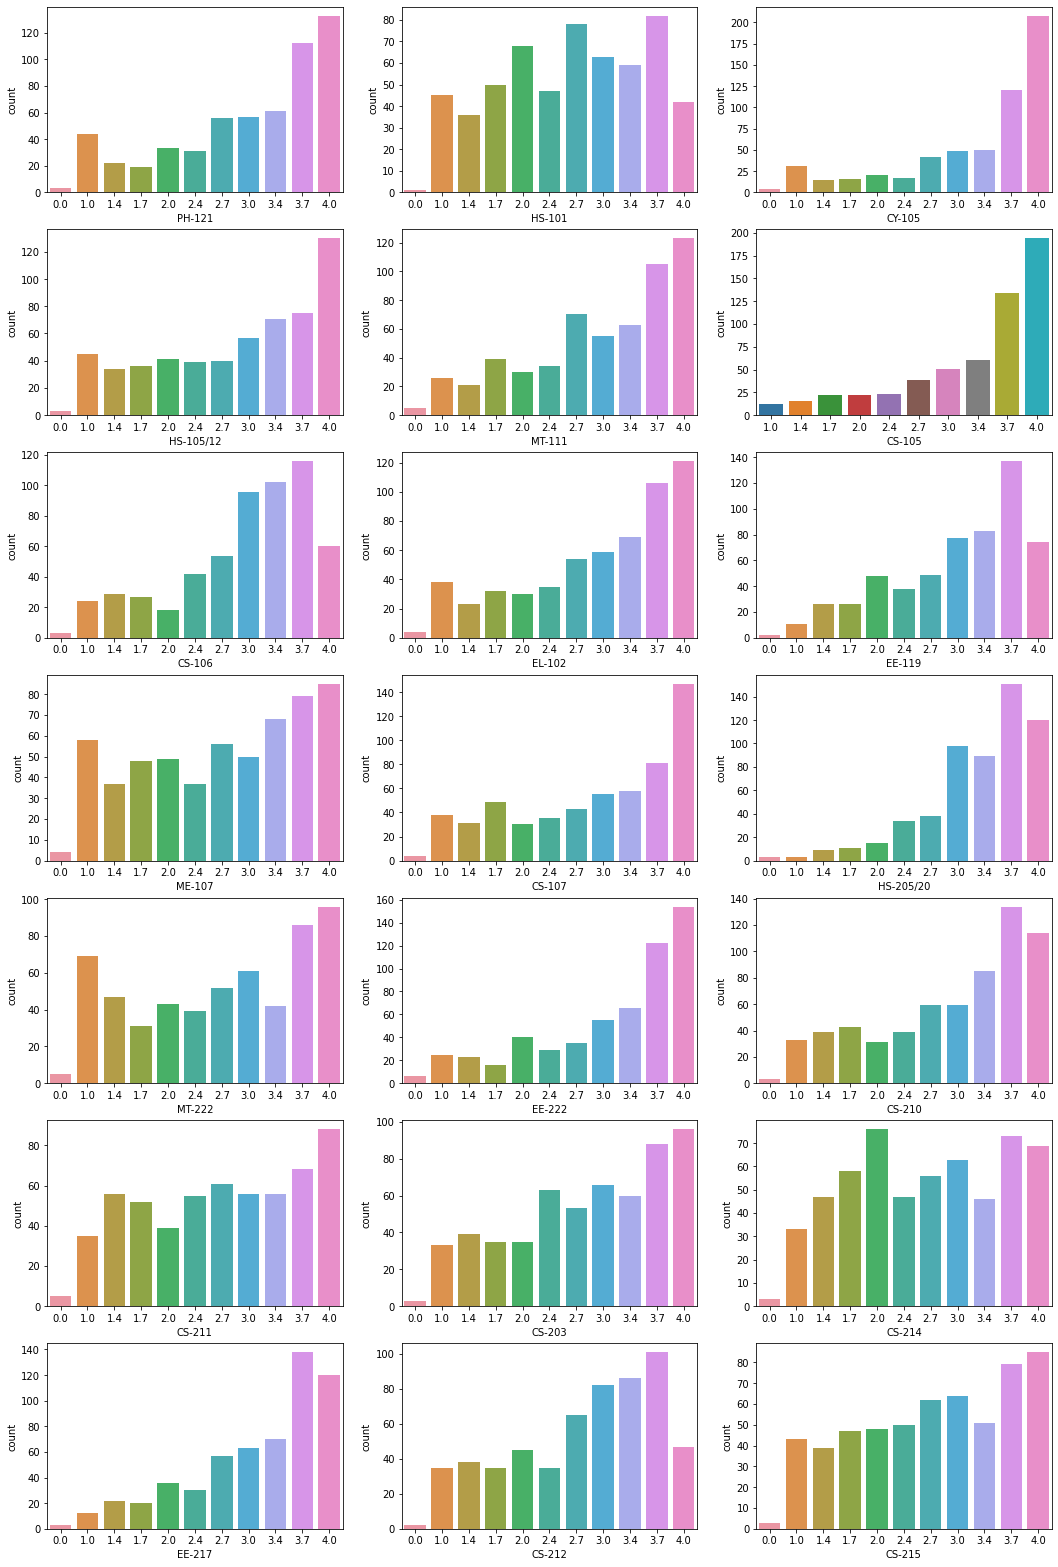

What you want to do? 
 1) Predict CGPA 
 2) Check the evaluate the above mentioned models 
 3) Countplots upto 2nd Year courses 
 4) Plotting CGPA column from data 
 5) Exit 

Enter option number: 4


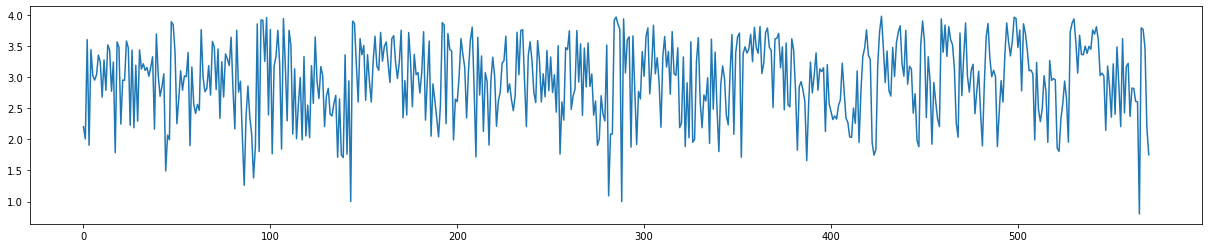

What you want to do? 
 1) Predict CGPA 
 2) Check the evaluate the above mentioned models 
 3) Countplots upto 2nd Year courses 
 4) Plotting CGPA column from data 
 5) Exit 

Enter option number: 5


***PREDICTION APP ENDED***





In [33]:
def Welcome():                          # Greeting func
  print('***Welcome to our prediction app!***'.upper(),end = '\n\n')
  # print('We have total 4 models for prediction: \n 1) Linear Regression model with First Year data \n 2) Random Forest Regression model with First Year data \n 3) Support Vector model with First & Second Year data \n 4) Decision Tree Regression model with First & Second Year data',end='\n\n')
  Menu1()
#--------------------------------------------------------
def Menu1():                            #Main menu func
  print('What you want to do? \n 1) Predict CGPA \n 2) Check the evaluate the above mentioned models \n 3) Countplots upto 2nd Year courses \n 4) Plotting CGPA column from data \n 5) Exit ', end= '\n\n')
  choice = int(input('Enter option number: '))
  while(1):
    if choice == 1:
      PredictionMenu()
      break
    elif choice == 2:
      AccuracyMenu()
      break
    elif choice == 3:
      Plotting()
      Menu1()
      break
    elif choice == 4:
      CGPA_plot()
      Menu1()
      break
    elif choice == 5:
      print('\n\n***Prediction App ENDED***\n\n'.upper())
      input()
      break
    else:
      choice = int(input('Enter correct option: '))
    return
#-----------------------------------------------------
def PredictionMenu():                 #prediction menu func
  print('We have total 4 models for prediction: \n 1) Linear Regression model with First Year data \n 2) Random Forest Regression model with First Year data \n 3) Support Vector model with First & Second Year data \n 4) Decision Tree Regression model with First & Second Year data \n 5) Back',end='\n\n')
  choice = int(input('Enter option number: '))
  while(1):
    if choice == 1:
      Predictor(model_1a,11)
      AfterPrediction(model_1a,11)
      break
    elif choice == 2: 
      Predictor(model_1b,11)
      AfterPrediction(model_1b,11)
      break
    elif choice == 3:
      Predictor(model_2a,22)
      AfterPrediction(model_2a,22)
      break
    elif choice == 4:
      Predictor(model_2b,22)
      AfterPrediction(model_2b,22)
      break
    elif choice == 5:
      Menu1()
      break

    else:
      choice = int(input('Enter correct option: '))
#--------------------------------------------------------
def AccuracyMenu():                   # Menu for accuracy 
  print('We have total 4 models \n 1) Linear Regression model with First Year data \n 2) Random Forest Regression model with First Year data \n 3) Support Vector model with First & Second Year data \n 4) Decision Tree Regression model with First & Second Year data \n 5) Back',end='\n\n')
  choice = int(input('Enter option number: '))
  while(1):
    if choice == 1:
      AccuracyChecker(model_1a,X_test,y_test,X_train,y_train)
      Evaluation(y_test,y_pred_1a)
      AfterAccuracyChecker()
      break
    elif choice == 2: 
      AccuracyChecker(model_1b,X_test,y_test,X_train,y_train)
      Evaluation(y_test,y_pred_1b)
      AfterAccuracyChecker()
      break
    elif choice == 3:
      AccuracyChecker(model_2a,X_test2,y_test2,X_train2,y_train2)
      Evaluation(y_test2,y_pred_2a)
      AfterAccuracyChecker()
      break
    elif choice == 4:
      AccuracyChecker(model_2b,X_test2,y_test2,X_train2,y_train2)
      Evaluation(y_test2,y_pred_2b)
      AfterAccuracyChecker()
      break
    elif choice == 5:
      Menu1()
      break
    else:
      choice = int(input('Enter correct option: '))
#---------------------------------------------------------
def AfterPrediction(model,range):         #Menu which will be displayed after prediction
  try:
    print('\n\nDo you want to: \n 1) Continue predicting \n 2) Exit\n\n')
    choice = int(input('Enter option: '))
    while(1):
      if choice == 1:
        Predictor(model,range)
        break
      elif choice == 2:
        PredictionMenu()
        break
      else:
        choice = int(input('Enter correct option: '))
  except ValueError:
    choice = int(input('Please Enter Integer: '))
#-----------------------------------------------------------
def AccuracyChecker(model,test_input,test_output,train_input,train_output):   # func for accuracy of different models 
  print('\n\nTrain Accuracy =',model.score(test_input,test_output)*100,'\n','Test Accuracy =',model.score(train_input,train_output)*100,'\n\n')
#------------------------------------------------------------
def AfterAccuracyChecker():           # Menu which will be displayed after differnt types of Evaluations
    print('\n\nDo you want(to): \n 1) Evaluation Menu \n 2) Back\n\n')
    choice = int(input('Enter option: '))
    while(1):
      if choice == 1:
        AccuracyMenu()
        break
      elif choice == 2:
        Menu1()
        return
      else:
        choice = int(input('Enter correct option: '))  
#--------------------------------------------------------------
def Evaluation(actual_values,predicted_values):  #func for evaluation other than accuracy
  from sklearn.metrics import mean_squared_error
  from sklearn.metrics import mean_absolute_error
  # actual value
  expected = actual_values
  # predicted value
  predicted = predicted_values
  # calculate errors
  errors = mean_squared_error(expected, predicted)
  # report error
  print(' MSE: '+str(errors))
  errors = mean_absolute_error(expected, predicted)
  print(' MAE: '+str(errors))
  errors = mean_squared_error(expected, predicted, squared=False)
  print('RMSE: '+str(errors))
      
Welcome()